In [1]:
import nltk
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import re
import collections
import math
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import tensorflow as tf
%matplotlib inline


In [88]:
xls = pd.ExcelFile('Disbursement - Merge Data.xlsx')
df1 = pd.read_excel(xls, 'Loan Sheet')
df2 = pd.read_excel(xls, 'Customer data Sheet')
df1=df1.apply(lambda x:x.astype(str).str.lower())
df2=df2.apply(lambda x:x.astype(str).str.lower())

In [89]:
df1.head()

,SR NO.,LOAN STATUS,DATE,LOAN ID,APPLICANT FIRST NAME,APPLICANT LAST NAME,LOAN AMOUNT,Loan Term,Interest Type,INTEREST RATE,...,COLLECTION DATE-3,EMI Date-3,Defaulter Tenure (DT)-3,Interest Charged (IC)-3,GST ON IC-3,Total Repayment-3,Total Collected,REMARKS,Policy ID,Refund Amount
0,1,closed,2019-02-21,11272,kaiomarz,kekuna,10000,45,nan,0.36,...,nan,nan,nan,nan,nan,nan,10000,successful,5,nan
1,2,closed,2019-02-25,9495,ashokkumar,jayakumar,5000,30,nan,0.36,...,nan,nan,nan,nan,nan,nan,5150,successful,5,nan
2,3,default collected,2019-02-26,13798,amol,nagare,5000,30,nan,0.36,...,nan,nan,nan,nan,nan,nan,5966,repayment done of rs.5966 on dated 03-04-2019 ...,5,nan
3,4,closed,2019-02-26,12305,prakash,desouza,3000,30,nan,0.36,...,nan,nan,nan,nan,nan,nan,3090,successful,5,nan
4,5,closed,2019-02-27,11754,ravi,mandavkar,3000,30,nan,0.36,...,nan,nan,nan,nan,nan,nan,3090,successful,5,nan


In [90]:
df2.head()

,SR NO.,Type of Application,DATE,LOAN ID,APPLICANT FIRST NAME,APPLICANT LAST NAME,GENDER,DATE OF BIRTH,MARITAL STATUS,RESIDENTIAL STATUS-OWNED/RENTED,...,EMI DUE DATE,EMI END DATE,CUSTOMER'S BANK NAME,Customer bank account type,NAME OF THE REFERENCE 1,CONTACT NUMBER,NAME OF THE REFERENCE 2,CONTACT NUMBER,Lender,LOAN STATUS
0,1,fresh,2019-02-21,11272,kaiomarz,kekuna,male,1977-09-07,married,self owned,...,2019-04-08,2019-04-08,zoroastrian co op bank limited,nan,arun shinde,9767756915.0,sachin ghadge,9702200856,apollo,closed
1,2,fresh,2019-02-25,9495,ashokkumar,jayakumar,male,1991-04-01 00:00:00,married,self owned,...,2019-03-27,2019-03-27,axis bank,nan,naveen kumar,8220718746.0,dharik,9600153649,apollo,closed
2,3,fresh,2019-02-26,13798,amol,nagare,male,1986-11-11 00:00:00,married,rented(company provided room),...,2019-03-28,2019-03-28,axis bank,nan,kunal,8097141310.0,anita,9271911124,apollo,default collected
3,4,fresh,2019-02-26,12305,prakash,desouza,male,1981-07-13 00:00:00,single,parent owned,...,2019-03-29,2019-03-29,axis bank,nan,james christian,9898259847.0,pintu christian,8780098879,apollo,closed
4,5,fresh,2019-02-27,11754,ravi,mandavkar,male,1985-12-20 00:00:00,married,parent owned,...,2019-03-30,2019-03-30,kotak mahindra bank,nan,chandrakant thakare,9769206128.0,mahesh shinde,9769206114,apollo,closed


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 52 columns):
SR NO.                     5881 non-null object
LOAN STATUS                5881 non-null object
DATE                       5881 non-null object
LOAN ID                    5881 non-null object
APPLICANT FIRST NAME       5881 non-null object
APPLICANT LAST NAME        5881 non-null object
LOAN AMOUNT                5881 non-null object
Loan Term                  5881 non-null object
Interest Type              5881 non-null object
INTEREST RATE              5881 non-null object
INTEREST AMOUNT            5881 non-null object
EMI AMOUNT                 5881 non-null object
PROCESSING FEES            5881 non-null object
GST (18%)                  5881 non-null object
Pre-emi interest           5881 non-null object
DISBURSED AMOUNT           5881 non-null object
Mode of Disbursement       5881 non-null object
DATE OF DISBURSEMENT       5881 non-null object
No. of Installments        58

In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 50 columns):
SR NO.                                                 5881 non-null object
Type of Application                                    5881 non-null object
DATE                                                   5881 non-null object
LOAN ID                                                5881 non-null object
APPLICANT FIRST NAME                                   5881 non-null object
APPLICANT LAST NAME                                    5881 non-null object
GENDER                                                 5881 non-null object
DATE OF BIRTH                                          5881 non-null object
MARITAL STATUS                                         5881 non-null object
RESIDENTIAL STATUS-OWNED/RENTED                        5881 non-null object
Address type                                           5881 non-null object
PERMANENT RESIDENTIAL ADDRESS                          58

Text(0, 0.5, 'Loans disembursed')

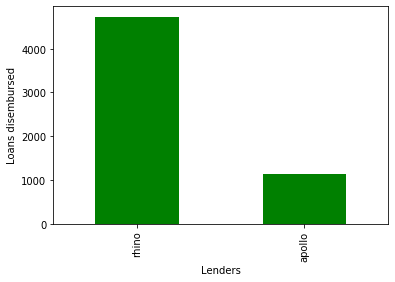

In [93]:
df1.Lender.value_counts().plot.bar(color='green')
plt.xlabel("Lenders")
plt.ylabel("Loans disembursed")

Text(0, 0.5, 'Loans disembursed')

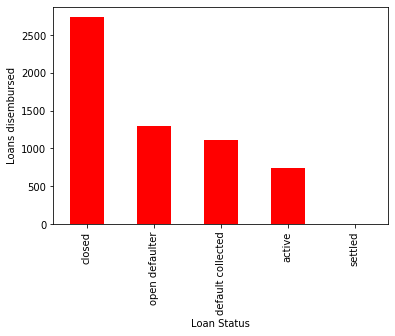

In [94]:
df1['LOAN STATUS'].value_counts().plot(kind='bar',color="red")
plt.xlabel("Loan Status")
plt.ylabel("Loans disembursed")

In [95]:
set(df1["LOAN STATUS"])

{'active', 'closed', 'default collected', 'open defaulter', 'settled'}

In [96]:
s=0
for i in range(0,len(df1)):
    if df1["EMI-1 COLLECTION STATUS"][i]=="collected ":
        df1["EMI-1 COLLECTION STATUS"][i]="collected"
    if df1["EMI-1 COLLECTION STATUS"][i]=="failed ":
        df1["EMI-1 COLLECTION STATUS"][i]="failed"

In [97]:
Rhino=df1[df1['Lender'] == "rhino"]
print(Rhino["LOAN STATUS"].value_counts())
print("\n")
print(df1["EMI-1 COLLECTION STATUS"].value_counts())

closed               2003
open defaulter       1154
default collected     838
active                740
Name: LOAN STATUS, dtype: int64


collected    3903
failed       1243
nan           735
Name: EMI-1 COLLECTION STATUS, dtype: int64


In [98]:
Apollo=df1[df1['Lender'] == "apollo"]
print(Apollo["LOAN STATUS"].value_counts())

closed               736
default collected    271
open defaulter       138
settled                1
Name: LOAN STATUS, dtype: int64


In [99]:
df1["LOAN STATUS"].value_counts()

closed               2739
open defaulter       1292
default collected    1109
active                740
settled                 1
Name: LOAN STATUS, dtype: int64

In [100]:
print(Apollo["EMI-1 COLLECTION STATUS"].value_counts())

collected    1017
failed        129
Name: EMI-1 COLLECTION STATUS, dtype: int64


In [101]:
print(df1["EMI-1 COLLECTION STATUS"].value_counts())

collected    3903
failed       1243
nan           735
Name: EMI-1 COLLECTION STATUS, dtype: int64


In [102]:
print(Rhino["EMI-1 COLLECTION STATUS"].value_counts())

collected    2886
failed       1114
nan           735
Name: EMI-1 COLLECTION STATUS, dtype: int64


In [103]:
set(Rhino["EMI-1 COLLECTION STATUS"])

{'collected', 'failed', 'nan'}

Text(0, 0.5, 'Number of loans disembursed by Rhino')

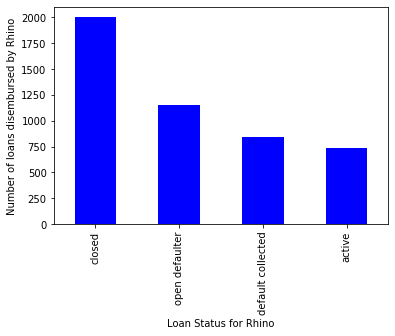

In [104]:
Rhino['LOAN STATUS'].value_counts().plot(kind='bar',color="blue")
plt.xlabel("Loan Status for Rhino")
plt.ylabel("Number of loans disembursed by Rhino")

Text(0, 0.5, 'Number of loans disembursed by Apollo')

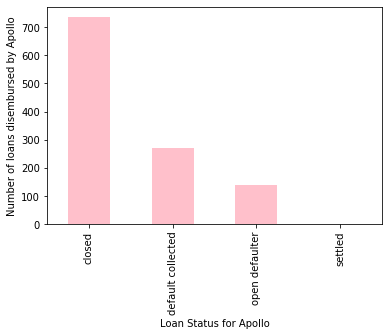

In [105]:
Apollo['LOAN STATUS'].value_counts().plot(kind='bar',color="pink")
plt.xlabel("Loan Status for Apollo")
plt.ylabel("Number of loans disembursed by Apollo")

In [106]:
#df1.iloc[0:100, 1:5]

In [107]:
len(df1.columns)

52

In [108]:
len(df2.columns)

50

In [109]:
l=[]
l2=[]#df2 column names
for i in range(0,len(df2.columns)):
    l.append(df2.columns[i])
    l2.append(df2.columns[i])

In [110]:
l1=[]#df1 column names not in df2
drop=[]
for i in range(0,len(df1.columns)):
    if df1.columns[i] not in l:
        l.append(df1.columns[i])
        l1.append(df1.columns[i])
    if df1.columns[i] in l2:#df1 columns which are in df2 too
        drop.append(df1.columns[i])

In [111]:
drop

['SR NO.',
 'LOAN STATUS',
 'DATE',
 'LOAN ID',
 'APPLICANT FIRST NAME',
 'APPLICANT LAST NAME',
 'LOAN AMOUNT',
 'Loan Term ',
 'Interest Type',
 'INTEREST RATE',
 'INTEREST AMOUNT',
 'EMI AMOUNT',
 'PROCESSING FEES',
 'GST (18%)',
 'Pre-emi interest',
 'DISBURSED AMOUNT',
 'Mode of Disbursement',
 'DATE OF DISBURSEMENT',
 'No. of Installments',
 'EMI DUE DATE',
 'EMI END DATE',
 'Lender']

In [112]:
len(l)

80

In [113]:
len(l2)

50

In [114]:
df1_1=df1.drop(drop,axis=1)

In [115]:
data=pd.concat([df2, df1_1], axis=1, sort=False)

In [116]:
data.head(7)

,SR NO.,Type of Application,DATE,LOAN ID,APPLICANT FIRST NAME,APPLICANT LAST NAME,GENDER,DATE OF BIRTH,MARITAL STATUS,RESIDENTIAL STATUS-OWNED/RENTED,...,COLLECTION DATE-3,EMI Date-3,Defaulter Tenure (DT)-3,Interest Charged (IC)-3,GST ON IC-3,Total Repayment-3,Total Collected,REMARKS,Policy ID,Refund Amount
0,1,fresh,2019-02-21,11272,kaiomarz,kekuna,male,1977-09-07,married,self owned,...,nan,nan,nan,nan,nan,nan,10000,successful,5,nan
1,2,fresh,2019-02-25,9495,ashokkumar,jayakumar,male,1991-04-01 00:00:00,married,self owned,...,nan,nan,nan,nan,nan,nan,5150,successful,5,nan
2,3,fresh,2019-02-26,13798,amol,nagare,male,1986-11-11 00:00:00,married,rented(company provided room),...,nan,nan,nan,nan,nan,nan,5966,repayment done of rs.5966 on dated 03-04-2019 ...,5,nan
3,4,fresh,2019-02-26,12305,prakash,desouza,male,1981-07-13 00:00:00,single,parent owned,...,nan,nan,nan,nan,nan,nan,3090,successful,5,nan
4,5,fresh,2019-02-27,11754,ravi,mandavkar,male,1985-12-20 00:00:00,married,parent owned,...,nan,nan,nan,nan,nan,nan,3090,successful,5,nan
5,6,fresh,2019-03-08,12503,jaiganesh,elangovan,male,1989-09-05 00:00:00,single,rented,...,nan,nan,nan,nan,nan,nan,0,failed,5,nan
6,7,fresh,2019-03-11,14404,varkala mahesh,mahesh,male,1986-07-05 00:00:00,married,self owned,...,nan,nan,nan,nan,nan,nan,5520,repayment received with 342 days default charges,5,nan


In [117]:
print(data["GENDER"].value_counts())

male      5379
female     502
Name: GENDER, dtype: int64


Text(0, 0.5, 'Number of loans disembursed by Rhino')

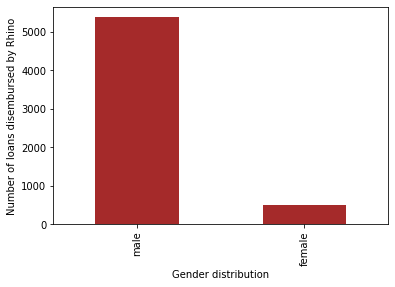

In [118]:
data['GENDER'].value_counts().plot(kind='bar',color="brown")
plt.xlabel("Gender distribution")
plt.ylabel("Number of loans disembursed by Rhino")

In [119]:
print(list(data["STATE"].value_counts()))

[1616, 713, 661, 533, 504, 442, 268, 229, 177, 167, 129, 84, 72, 70, 65, 28, 26, 19, 18, 16, 10, 9, 7, 7, 6, 3, 1, 1]


In [120]:
dict_state=dict( data["STATE"].value_counts() )
dict_state.keys()

dict_keys(['maharashtra', 'karnataka', 'telangana', 'gujarat', 'delhi', 'tamil nadu', 'uttar pradesh', 'rajasthan', 'andhra pradesh', 'haryana', 'madhya pradesh', 'punjab', 'bihar', 'kerala', 'odisha', 'assam', 'chhattisgarh', 'jharkhand', 'west bengal', 'uttarakhand', 'goa', 'chandigarh', 'himachal pradesh', 'puducherry (pondicherry)', 'dadar and nagar haveli', 'tripura', 'new delhi south', 'jammu and kashmir'])

In [121]:
set(data["STATE"])

{'andhra pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadar and nagar haveli',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal pradesh',
 'jammu and kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'madhya pradesh',
 'maharashtra',
 'new delhi south',
 'odisha',
 'puducherry (pondicherry)',
 'punjab',
 'rajasthan',
 'tamil nadu',
 'telangana',
 'tripura',
 'uttar pradesh',
 'uttarakhand',
 'west bengal'}

Text(0, 0.5, 'States')

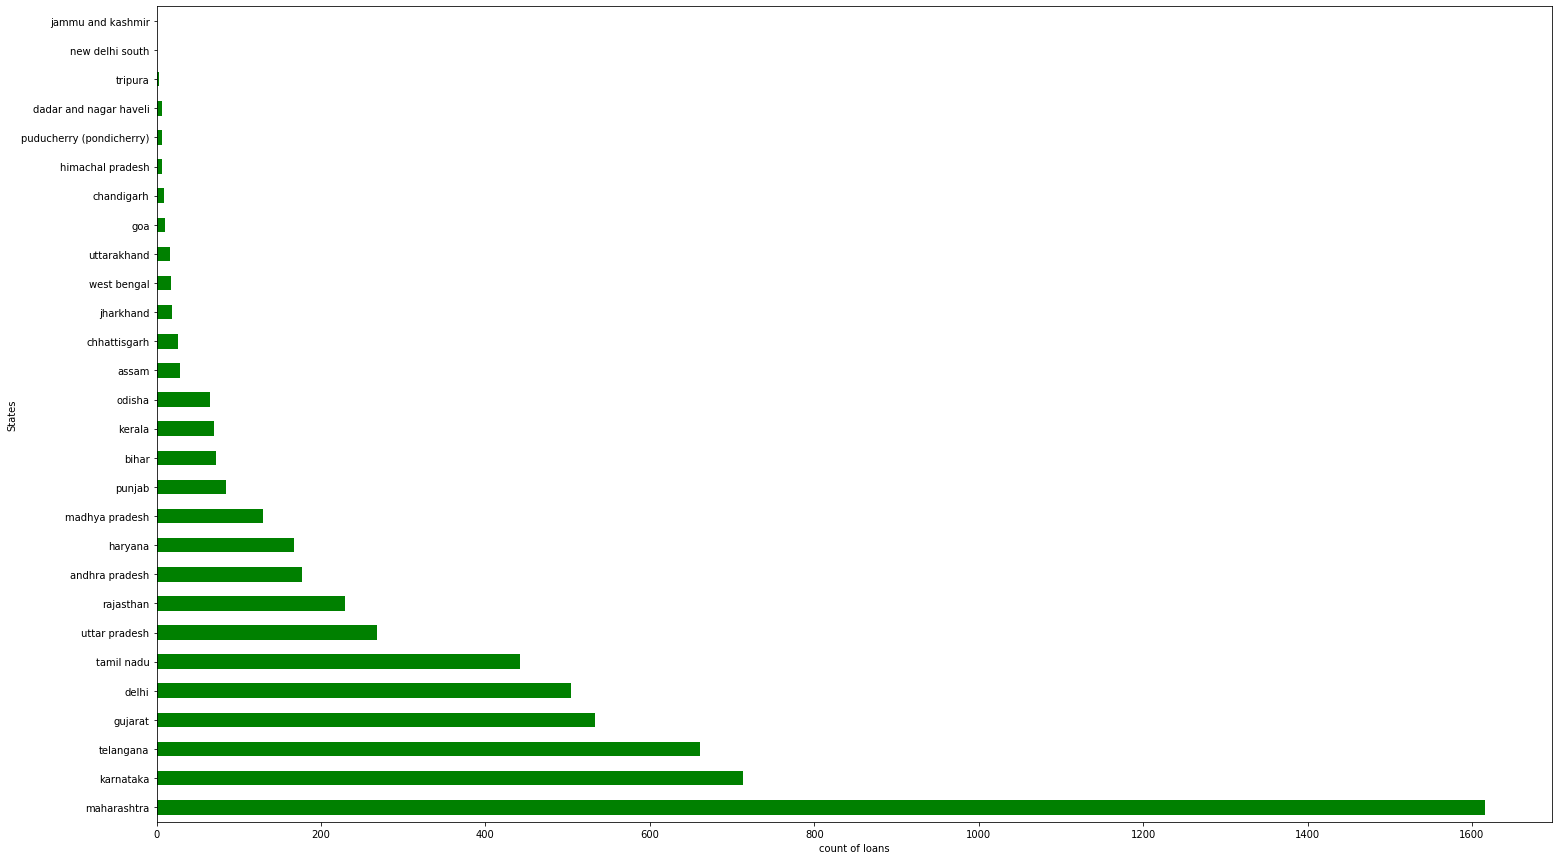

In [122]:
#g = sns.countplot(y=list(data["STATE"]), order=list(dict_state.keys()),size=(20,10))
#g.set_ylabel("States")
#g.set_title('Distribution of Loans')
#plt.show()
data['STATE'].value_counts().head(30).plot( kind='barh',figsize=(25,15),color="green")
plt.xlabel("count of loans")
plt.ylabel("States")

In [123]:
inc=list(data['NET MONTHLY INCOME'])
inc=[int(i) for i in inc]

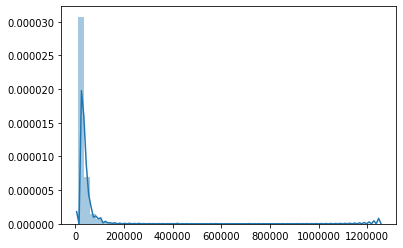

In [124]:
sns.distplot(inc)#monthly income vs no. of loans

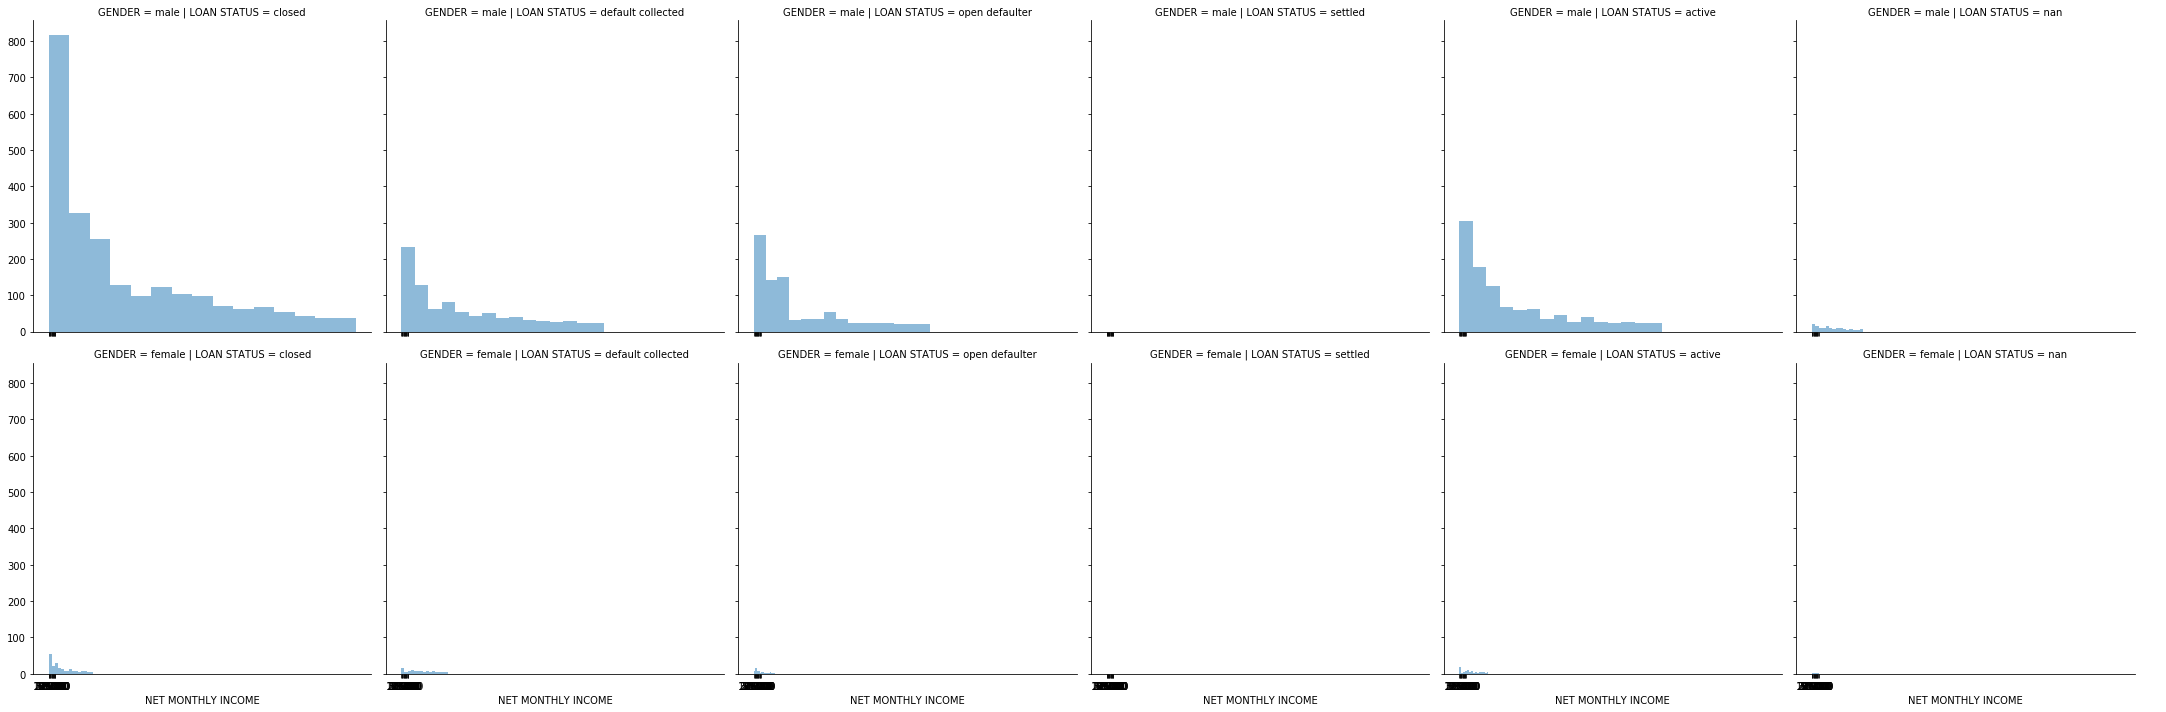

In [125]:
g = sns.FacetGrid(data, row='GENDER', col='LOAN STATUS', height=5)
g.map(plt.hist, 'NET MONTHLY INCOME', alpha=0.5, bins=15,)
g.add_legend()
plt.show()
#sns.palplot(sns.color_palette("RdBu", n_colors=7))

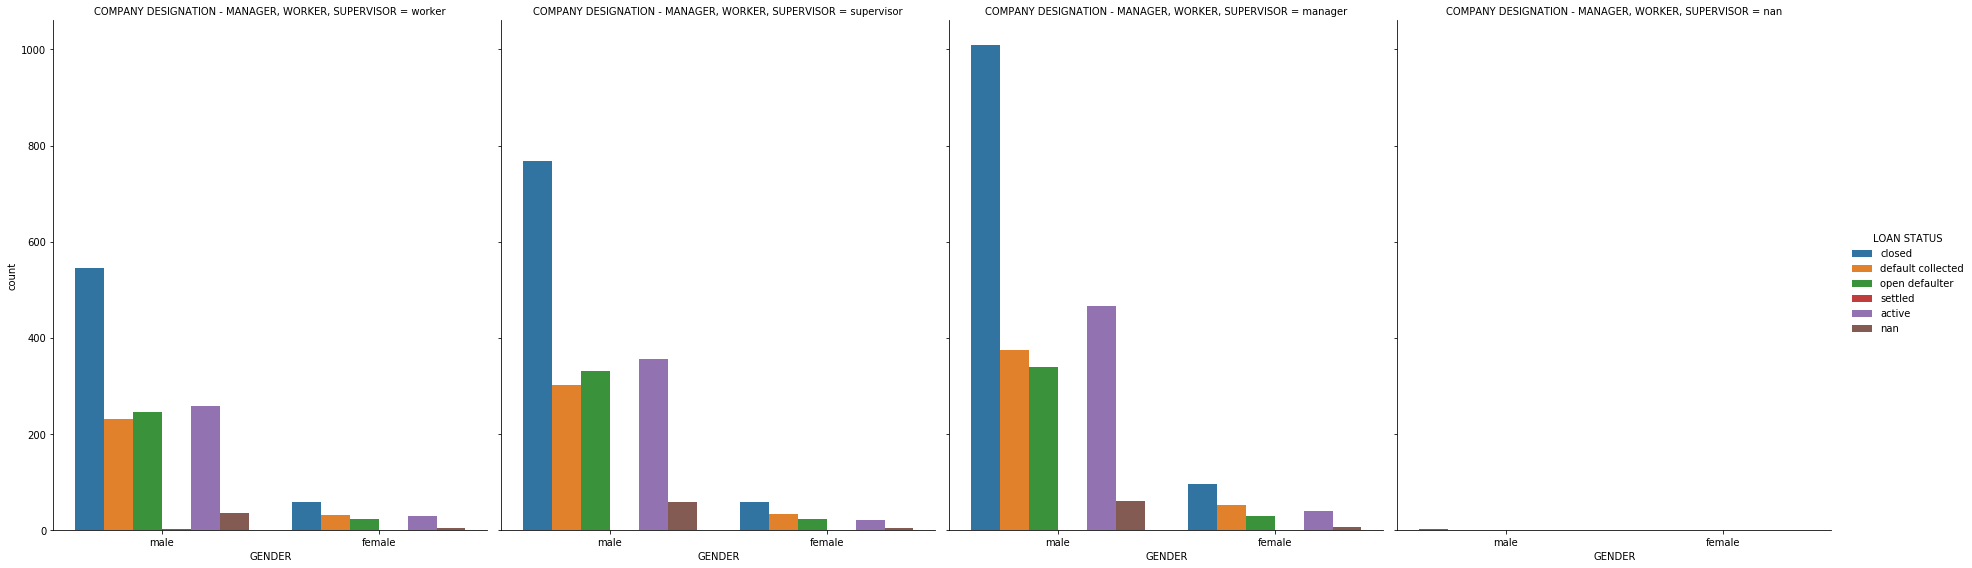

In [126]:
g = sns.catplot(x="GENDER", hue="LOAN STATUS", col="COMPANY DESIGNATION - MANAGER, WORKER, SUPERVISOR",
                data=data, kind="count",
                height=8, aspect=0.8);


In [127]:
set(list(data["CITY"]))

{' new delhi',
 ',bangalore ',
 '122505',
 '400605',
 '495081',
 '560072',
 '560091',
 '562159',
 '673317',
 'abohar',
 'adilabad',
 'adipur',
 'agartala ',
 'agra',
 'ahe',
 'ahemdabad ',
 'ahemedabad ',
 'ahmadabad ',
 'ahmedabad',
 'ahmedabad ',
 'ahmedabad city',
 'ahmedabad gpo',
 'ahmednagar',
 'ahmednagar ',
 'ahmwdabad',
 'ajmer',
 'ajmer ',
 'akola',
 'alappuha',
 'alappuzha',
 'aligarh',
 'aligarh ',
 'allahabad',
 'alleppey',
 'alwar',
 'alwar ',
 'amalner ',
 'amaravati',
 'ambajogai',
 'ambala cantt ',
 'ambarnath',
 'ambernath',
 'ambernath ',
 'ambur',
 'amravari',
 'amravati',
 'amravati ',
 'amreli',
 'amritsar',
 'amritsar ',
 'anand',
 'anandnagar',
 'anantapur',
 'angul',
 'anjar',
 'ankleshwar',
 'ankleshwar ',
 'arakkonam',
 'arakkonam ',
 'araria',
 'arrah',
 'aska',
 'auragabad ',
 'aurangabad',
 'aurangabad ',
 'aurangabad(maharashtra)',
 'aurangbad ',
 'azamgarh',
 'badarwas',
 'baddi',
 'badlapur',
 'badlapur ',
 'badlapur.',
 'badlapur.thane',
 'bagalkot',
 

In [128]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Refund Amount,0,0.0
Policy ID,0,0.0
NET MONTHLY INCOME,0,0.0
"MODE OF SALARY - CHEQUE, NEFT, FUND TRANSFER",0,0.0
CREDIT SCORE,0,0.0
LOAN PURPOSE,0,0.0
LOAN AMOUNT,0,0.0
Loan Term,0,0.0
Interest Type,0,0.0
INTEREST RATE,0,0.0


In [133]:
for i in range(0,len(data)):
    if data['RESIDENTIAL STATUS-OWNED/RENTED'][i]=="owned" or data['RESIDENTIAL STATUS-OWNED/RENTED'][i]=="self-owned":
        data['RESIDENTIAL STATUS-OWNED/RENTED'][i]="self owned"
    elif data['RESIDENTIAL STATUS-OWNED/RENTED'][i]=="parent-owned" or data['RESIDENTIAL STATUS-OWNED/RENTED'][i]==" parent owned":
        data['RESIDENTIAL STATUS-OWNED/RENTED'][i]="parent owned"
    elif data['RESIDENTIAL STATUS-OWNED/RENTED'][i]==" rented":
        data['RESIDENTIAL STATUS-OWNED/RENTED'][i]="rented"
    

In [134]:
resi=dict(data['RESIDENTIAL STATUS-OWNED/RENTED'].value_counts())
resi

{'parent owned': 2823,
 'rented': 1660,
 'self owned': 1395,
 'rented(company provided room)': 3}

# Percentage of loans as per Residential-Status

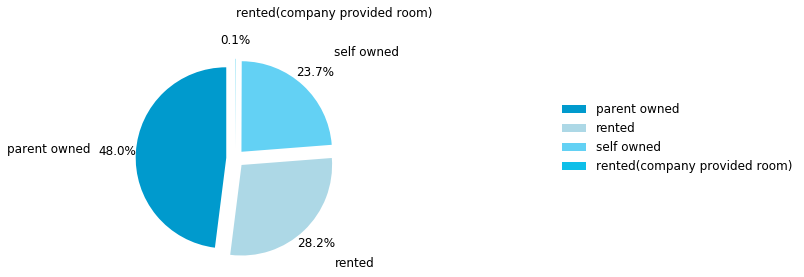

In [158]:
fig, ax = plt.subplots()
#plt.rcParams['font.sans-serif'] = 'Arial'
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['text.color'] = '#909090'
#plt.rcParams['axes.labelcolor']= '#909090'
#plt.rcParams['xtick.color'] = '#909090'
#plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']

labels =  list(resi.keys())
percentages =list(resi.values())
explode=(0.1,0.1,0.1,0.1)
ax.pie(percentages, labels=labels,explode=explode,colors=color_palette_list[0:], autopct='%1.1f%%',shadow=False, startangle=90,   
       pctdistance=1.2,labeldistance=1.5)
ax.axis('equal')
#ax.set_title("Percentage of loans as per Residential-Status")
ax.legend(frameon=False, bbox_to_anchor=(2.2,0.8))